In [6]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualisasi
from termcolor import colored as cl # text customization
import itertools # advanced tools
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm
from sklearn.svm import SVC #SVM Algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest Tree Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import joblib
from sklearn.metrics import roc_curve, auc


In [7]:
df_train = pd.read_csv("data_train_after_smote.csv")
df_test = pd.read_csv("data_test.csv")
print("Fin")

Fin


In [8]:
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']

X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

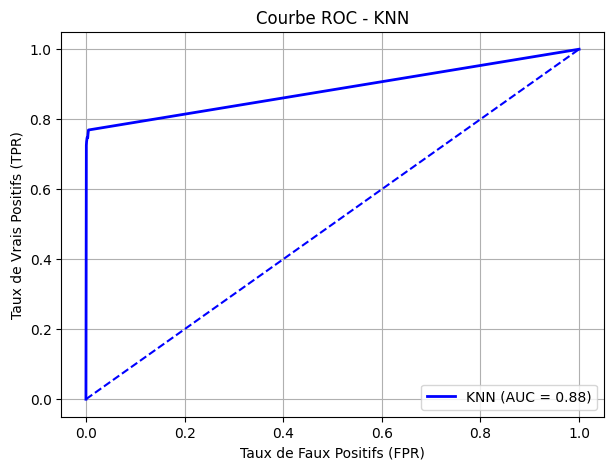

In [19]:
knn_loaded = joblib.load('KNN_model.joblib')
y_proba_knn = knn_loaded.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()


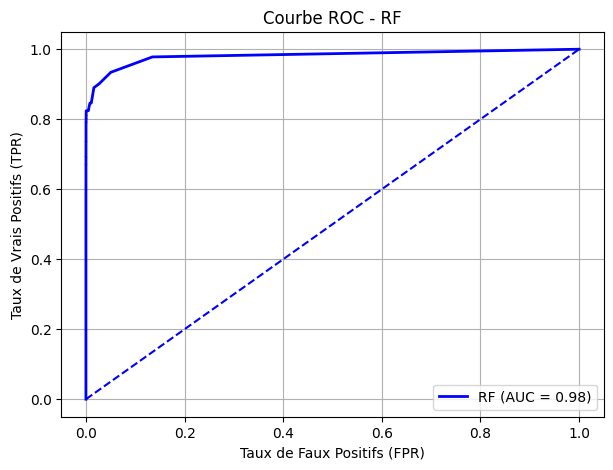

In [20]:
rf_loaded = joblib.load('Random_Forest_model.joblib')
y_proba_rf = rf_loaded.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'RF (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - RF')
plt.legend(loc="lower right")
plt.grid()
plt.show()


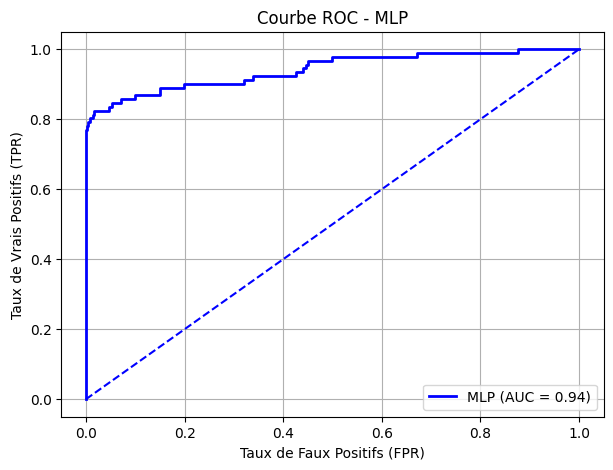

In [29]:
mlp_loaded = joblib.load('MLP_model.joblib')
y_proba_mlp = mlp_loaded.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_mlp)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

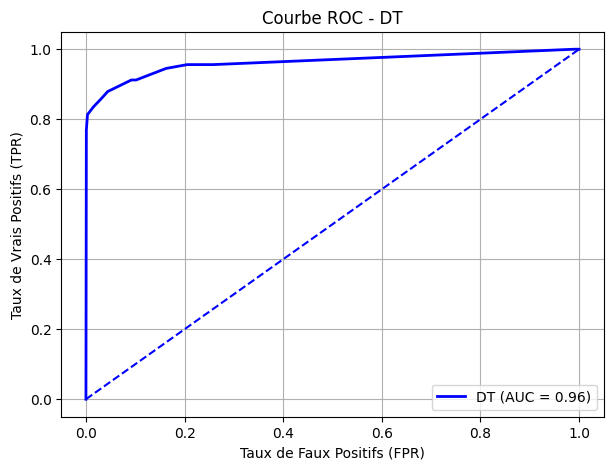

In [22]:
dt_loaded = joblib.load('decision_tree_model.joblib')
y_proba_dt = dt_loaded.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'DT (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - ')
plt.legend(loc="lower right")
plt.grid()
plt.show()

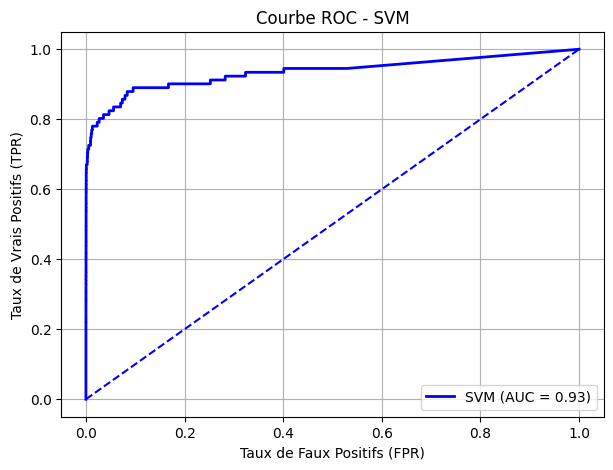

In [30]:
svm_loaded = joblib.load('SVM_model.joblib')
y_proba_svm = svm_loaded.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # diagonale aléatoire
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()

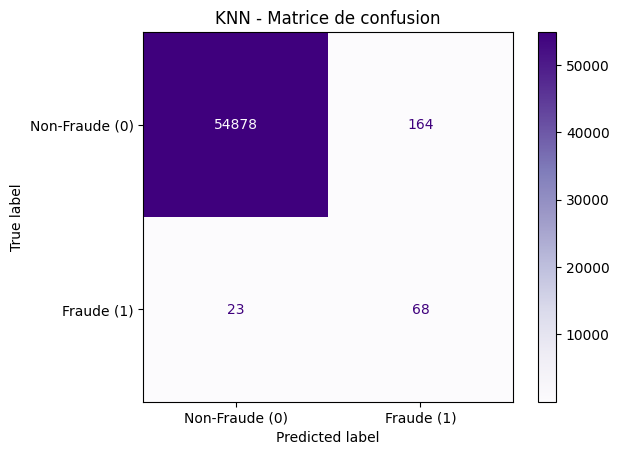

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
#  Matrice de confusion KNN
y_pred_knn = knn_loaded.predict(X_test_scaled)
knn_matrix = confusion_matrix(y_test, y_pred_knn)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=knn_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Purples)
plt.title("KNN - Matrice de confusion")
plt.show()

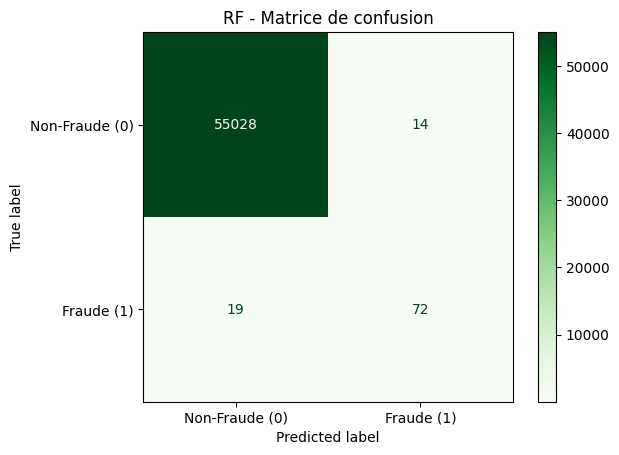

In [35]:
#  Matrice de confusion RF
y_pred_rf = rf_loaded.predict(X_test)
rf_matrix = confusion_matrix(y_test, y_pred_rf)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Greens)
plt.title("RF - Matrice de confusion")
plt.show()

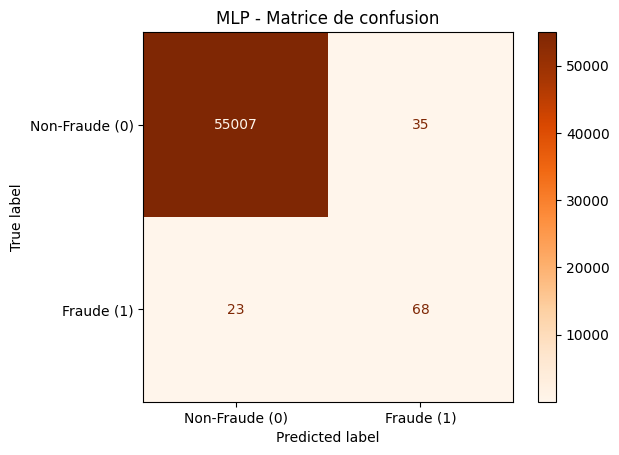

In [36]:
#  Matrice de confusion MLP
y_pred_mlp = mlp_loaded.predict(X_test_scaled)
mlp_matrix = confusion_matrix(y_test, y_pred_mlp)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Oranges)
plt.title("MLP - Matrice de confusion")
plt.savefig('svm_cm_plot.png')
plt.show()

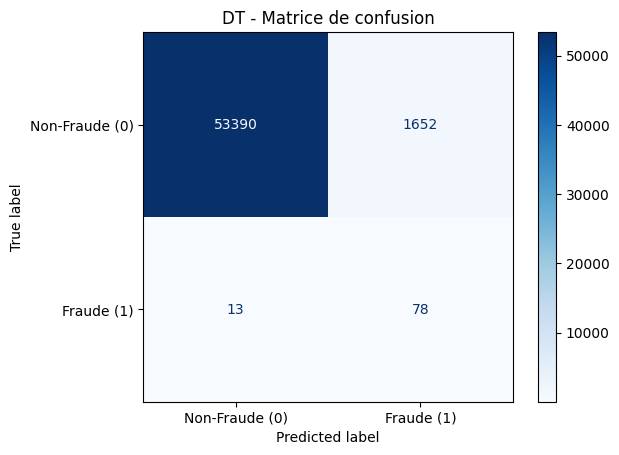

In [37]:
#  Matrice de confusion DT
y_pred_dt = dt_loaded.predict(X_test)
dt_matrix = confusion_matrix(y_test, y_pred_dt)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=dt_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("DT - Matrice de confusion")
plt.savefig('svm_cm_plot.png')
plt.show()

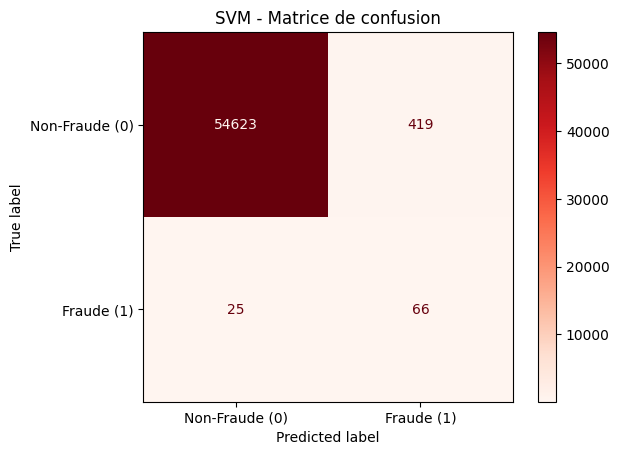

In [39]:
#  Matrice de confusion SVM
y_pred_svm = svm_loaded.predict(X_test_scaled)
svm_matrix = confusion_matrix(y_test, y_pred_svm)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=svm_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Reds)
plt.title("SVM - Matrice de confusion")
plt.savefig('svm_cm_plot.png')
plt.show()